<a href="https://colab.research.google.com/github/chandradutta/CS23M021_A1/blob/master/DeepLearning_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing wandb
!pip install wandb
import wandb
from wandb.keras import WandbCallback
import socket
socket.setdefaulttimeout(30)
wandb.login()
wandb.init(project='DL_Assignment_1')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: chandraduttamamidi (cs23m021). Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 1s 0us/step


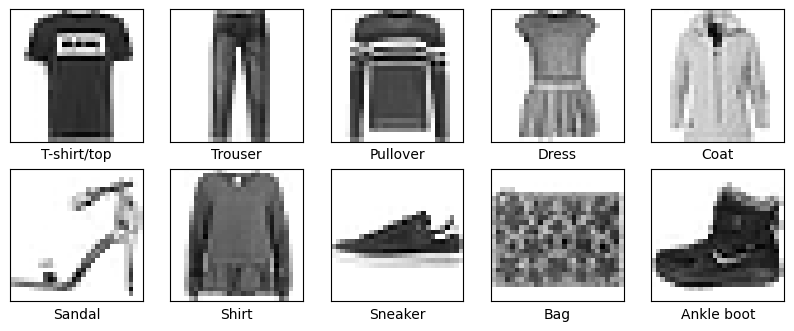

In [2]:
# import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# wandb.init(project="fashion-mnist-sample-images")

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
# print (len(train_images[0]))


# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    idx = next(idx for idx, label in enumerate(y_train) if label == i)
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
    # wandb.log({f"example_{class_names[i]}": [wandb.Image(x_train[idx], caption=class_names[i])]})

# wandb.finish()

In [4]:
import numpy as np
# def sigmoid(z):
#     clipped_z=np.clip(z,-500, 500)
#     # return 1 / (1 + np.exp(-clipped_z))
def softmax(z):
    z=np.clip(z,-500,500)
    eps = 1e-6
    return (np.exp(z-max(z)) / (sum(np.exp(z-max(z))) + eps))
def sigmoid(z):
    clipped_z=np.clip(z,-500, 500)
    return 1 / (1 + np.exp(-clipped_z))
def tanh(z):
  clipped_z = np.clip(z, -100, 100)
  return np.tanh(clipped_z)
def relu(Z):
  A = np.maximum(0, Z)
  return A
#derivatives
def tanh_derivative(z):
  return 1-np.tanh(z)**2
def relu_derivative(z):
  return np.where(z>0,1,0)
def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))


#weights initialization

def weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  ws.append(np.random.randn(n,784))
  bs.append(np.random.randn(n,1))
  for i in range(1,num_of_layers):
    ws.append(np.random.randn(n,n))
    bs.append(np.random.randn(n,1))
  ws.append(np.random.randn(10,n))
  bs.append(np.random.randn(10,1))
  return ws,bs

def xavier_weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  ws.append(np.random.randn(n,784))
  bs.append(np.zeros((n,1)))
  for i in range(1,num_of_layers):
    ws.append(np.random.randn(n,n))
    bs.append(np.zeros((n,1)))
  ws.append(np.random.randn(10,n))
  bs.append(np.zeros((10,1)))
  return ws,bs






#forward

def calculate_pre_activation(weights, input_data, biases):
    return np.matmul(weights, input_data) + biases

def apply_activation(pre_activation, activation_function):
    if activation_function == 'sigmoid':
        return sigmoid(pre_activation)
    elif activation_function == 'tanh':
        return tanh(pre_activation)
    else :
        return relu(pre_activation)
def forward(x_train, ws, bs, activationfun, hidLay):
    x = x_train.reshape(784, 1) / 255.0
    pre_act = [0 for i in range(hidLay + 1)]
    activ = [0 for i in range(hidLay + 1)]

    for i in range(hidLay):
        if i == 0:
            pre_act[i] = calculate_pre_activation(ws[i], x, bs[i])
        else:
            pre_act[i] = calculate_pre_activation(ws[i], activ[i - 1], bs[i])

        activ[i] = apply_activation(pre_act[i], activationfun)
        # print(pre_act[i].shape)
        # print(activ[i].shape)
    pre_act[hidLay] = calculate_pre_activation(ws[hidLay], activ[hidLay - 1], bs[hidLay])
    activ[hidLay] = softmax(pre_act[hidLay])
    # print(pre_act[-1].shape)
    # print(activ[-1].shape)
    # prin(1)
    return activ, pre_act

#calculate back propagation

def calculate_gradients(d_a, activation_prev, theta, activationfun):
    d_w = np.matmul(d_a, activation_prev.T)
    d_b = np.copy(d_a)
    return d_w, d_b

def update_d_a(d_a, pre_activation_prev, theta, activationfun):
    d_h_prev = np.matmul(theta.T, d_a)

    if activationfun == 'sigmoid':
        d_a_new = np.multiply(d_h_prev, sigmoid_derivative(pre_activation_prev))
    elif activationfun == 'tanh':
        d_a_new = np.multiply(d_h_prev, tanh_derivative(pre_activation_prev))
    else:
        d_a_new = np.multiply(d_h_prev, relu_derivative(pre_activation_prev))

    return d_a_new



def compute(yt):
  e_l = np.zeros((10, 1))
  e_l[yt] = 1
  return e_l
def backwardPropagation(theta_w, activations, pre_activations, yt, hidLay, x, activationfun, l_fun):
    d_w = [0 for _ in range(hidLay + 1)]
    d_b = [0 for _ in range(hidLay + 1)]
    o_hot=compute(yt)
    if l_fun == 'entropy':
        d_a = -(o_hot - activations[hidLay])
    else:
        d_a = (activations[hidLay] - o_hot) * activations[hidLay] * (1 - activations[hidLay])

    layers = len(theta_w) - 1

    # while layers > 0:
    for layers in range(layers,0,-1):
        d_w[layers], d_b[layers] = calculate_gradients(d_a, activations[layers - 1], theta_w[layers], activationfun)
        d_a = update_d_a(d_a, pre_activations[layers - 1], theta_w[layers], activationfun)
        # layers -= 1

    d_w[0] = np.matmul(d_a, x.T)
    d_b[0] = np.copy(d_a)

    return d_w, d_b




def accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun):
  acc=0
  val=0
  for i in range(54000):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    # print(np.argmax(act[-1]),end=",")
    if(np.argmax(act[-1])==y_train[i]):
     acc=acc+1
    temp=act[-1]
    if(l_fun=="entropy"):
     val=val-np.log(temp[y_train[i]]+(1e-5))
    elif (l_fun=="mean_squared_error"):
     val+=np.sum((y_train[i] -act[-1]) ** 2)
  return (acc/540),val
  # return (acc/540)

def validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun):
  accuracy=0
  val=0
  start_index = int(len(x_train) * 0.1)

  for i in range(start_index, len(x_train)):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    if(np.argmax(act[-1])==y_train[i]):
      accuracy+=1
    temp=act[-1]
    val=val-np.log(temp[y_train[i]]+(1e-5))
  return (accuracy/(int(len(x_train))))*100,val





def do_sgd(theta_w,theta_b,x_train,y_train, learning_rate, max_iterations,activationfun,hidLay,l_fun):
  for ii in range(max_iterations):
    dw = [0 for iii in range(0,hidLay+1)]
    db = [0 for iii in range(0,hidLay+1)]

    for xt,yt in zip(x_train,y_train):
      # print(xt.shape)
      activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
      # activations.reverse()
      # print(activations[-1].shape)
      x = xt.reshape(784,1) / 255.0
      gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
      for i in range(len(theta_w)):
        theta_w[i] = theta_w[i] - learning_rate * gradients_weights[i]
        theta_b[i] = theta_b[i] - learning_rate * gradients_biases[i]
    acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
    v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
    print(acc,loss)
    print(v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc})
    wandb.log({"Train_Loss" : loss})
    wandb.log({"Validation_acc" : v_acc})
    wandb.log({"Validation_loss" : v_loss})




def do_mgd(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(b) for b in theta_b]  # Initialize previous gradients for biases

    for epoch in range(max_epochs):
        t=1
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        for xt,yt in zip(x_train,y_train):
            # print(xt.shape)
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # activations.reverse()
            # print(activations[-1].shape)
            x = xt.reshape(784,1) / 255.0
            gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            # Compute squared gradients and update parameters
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
                if(t+1)%batch_size==0:
                  # Update weights and biases
                  theta_w[i] -= (eta * d_w[i])-weight_decay*theta_w[i]
                  theta_b[i] -= eta * d_b[i]
                  # print(theta_w[i][0][0])
                  # Update previous gradients for the next iteration
                  prev_dw[i] = d_w[i]
                  prev_db[i] = d_b[i]
                  d_w = [np.zeros_like(w) for w in theta_w]
                  d_b = [np.zeros_like(b) for b in theta_b]
            t=t+1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        # wandb.log({"Train_Accuracy" : acc})
        # wandb.log({"Train_Loss" : loss})
        # wandb.log({"Validation_acc" : v_acc})
        # wandb.log({"Validation_loss" : v_loss})

In [45]:
# hidLay=2
# theta_w,theta_b=weights(hidLay,64)
# # activations, pre_activations=forward(x_train[1], theta_w, theta_b, 'sigmoid', hidLay)
# # x = x_train[1].reshape(784,1) / 255.0
# # gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,y_train[1],hidLay,x,'sigmoid','entropy')
# # do_sgd(theta_w,theta_b,x_train,y_train, 0.001, 5,'sigmoid',hidLay,'entropy')
# do_mgd(5, x_train, y_train, theta_w, theta_b, 0.001, 0.5,0.0005,'sigmoid',64,'entropy',hidLay)

In [ ]:
def mainfunction(optimization_algorithm,max_epochs, x_train, y_train, theta_w, theta_b,learning_rate, beta,beta1,weight_decay,activationfun,batch_size,l_fun,hidLay):
  if optimization_algorithm == 'mgd':
    do_mgd(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  # elif optimization_algorithm == 'ngd':
  #   do_nag(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  # elif optimization_algorithm == 'rmsprop':
  #     do_rmsprop(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  # elif optimization_algorithm == 'adam':
  #   do_adam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
  # elif optimization_algorithm == 'nadam':
  #   do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
  # else:
    do_sgd(theta_w,theta_b,x_train,y_train, learning_rate, max_epochs,activationfun,hidLay,l_fun)

def main():
  wandb.init(project="DL_Assignment_1", entity="cs23m021")
  p=wandb.config
  with wandb.init(project='DL_Assignment_1') as run:
    theta_w=[]
    theta_b=[]
    if (p.weightInit=="random"):
      theta_w,theta_b=weights(p.hidLay,p.neurons)
    if (p.weightInit=="xavier"):
      theta_w,theta_b=xavier_weights(p.hidLay,p.neurons)
    mainfunction(p.optimization_algorithm,p.max_epochs,x_train, y_train,theta_w, theta_b,p.learning_rate,0.9,0.99,p.weight_decay,p.activationfun,p.batch_size,p.l_fun,p.hidLay)

parameters_from_sweep = {
    'method' : 'bayes',
    'name'   : 'Accuracy',
    'metric' : {
        'goal' : 'maximize',
        'name' : 'Accuracy',
    },
    'parameters' : {
        'neurons':{'values':[32,64,128]},
        'optimization_algorithm':{'values':['mgd']},
        'max_epochs' : {'values' : [5,10]},
        'hidLay'       : {'values' : [3,4,5]},
        'weight_decay' : {'values' : [0,0.0005,0.5] } ,
        'learning_rate' : {'values' : [0.0001,0.00001]},
        'weightInit' : {'values': ['random','xavier']},
        'batch_size' : {'values': [16,32,64]},
        'l_fun':{'values':['entropy']},
        'activationfun' : {'values' : ['sigmoid','tanh']}
    }
}

sweepId = wandb.sweep(parameters_from_sweep,project = 'DL_Assignment_1')
wandb.agent(sweepId,function=main,count=5)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: 348cs91j
Sweep URL: https://wandb.ai/cs23m021/DL_Assignment_1/sweeps/348cs91j


wandb: Agent Starting Run: 7s5elxpv with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 32
wandb: 	optimization_algorithm: mgd
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


16.048148148148147 [294071.63169036]
14.431666666666668 [294281.29917025]
25.998148148148147 [212260.65980516]
23.253333333333334 [212260.47210106]
32.05555555555556 [176435.68213164]
28.76 [176028.24198244]
36.13148148148148 [153946.96539946]
32.395 [153879.82644962]
40.492592592592594 [140533.53406345]
36.406666666666666 [139923.2064323]
53.59444444444444 [85708.77115293]
48.27666666666667 [85283.64371451]
56.6037037037037 [72475.49799808]
50.985 [72056.6350608]
58.86666666666667 [66375.28162715]
53.04833333333333 [65952.4337548]
60.35740740740741 [62495.97927525]
54.388333333333335 [62251.4195324]
61.37407407407407 [60014.48129346]
55.343333333333334 [59727.02406997]


Train_Accuracy,▁▄▆▇█
Train_Loss,█▄▃▂▁
Validation_acc,▁▄▆▇█
Validation_loss,█▄▃▂▁
Train_Accuracy,61.37407
Train_Loss,60014.48129
Validation_acc,55.34333
Validation_loss,59727.02407


wandb: Agent Starting Run: ynhvpgz4 with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 16
wandb: 	hidLay: 3
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 64
wandb: 	optimization_algorithm: mgd
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


31.488888888888887 [240292.43195222]
28.353333333333335 [239707.33930244]
39.553703703703704 [170874.02135516]
35.75666666666667 [170098.39984806]
44.611111111111114 [139701.91638711]
40.2 [139494.27796167]
49.19814814814815 [122473.89680941]
44.25333333333333 [122275.61655121]
51.19074074074074 [109824.62613323]
46.00666666666667 [109723.28781372]
57.74629629629629 [79915.36727821]
51.98166666666667 [79843.29535153]
60.8962962962963 [69574.54456881]
54.776666666666664 [69445.21437127]
62.70925925925926 [63582.19458686]
56.41166666666667 [63529.14724299]
63.72222222222222 [59932.78471956]
57.361666666666665 [59843.76569636]
64.42962962962963 [57344.97344457]
57.99833333333333 [57261.13469539]


Train_Accuracy,▁▄▆▇█
Train_Loss,█▅▃▂▁
Validation_acc,▁▄▆▇█
Validation_loss,█▅▃▂▁
Train_Accuracy,64.42963
Train_Loss,57344.97344
Validation_acc,57.99833
Validation_loss,57261.1347


wandb: Agent Starting Run: pn0ugoj3 with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 64
wandb: 	hidLay: 3
wandb: 	l_fun: entropy
wandb: 	learning_rate: 1e-05
wandb: 	max_epochs: 5
wandb: 	neurons: 32
wandb: 	optimization_algorithm: mgd
wandb: 	weightInit: random
wandb: 	weight_decay: 0.5
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


7.862962962962963 [424840.48339118]
7.131666666666667 [424674.99454225]


<ipython-input-4-849217699aed>:63: RuntimeWarning: overflow encountered in matmul
  return np.matmul(weights, input_data) + biases
<ipython-input-4-849217699aed>:63: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(weights, input_data) + biases


9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]


Train_Accuracy,▁▁▁▁▁
Validation_acc,▁▁▁▁▁
Train_Accuracy,9.94444
Train_Loss,nan
Validation_acc,9.06667
Validation_loss,nan


wandb: Agent Starting Run: jku1k5bc with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: mgd
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


12.938888888888888 [458767.96529601]
11.63 [458706.50408168]
12.018518518518519 [519027.65884351]
10.786666666666667 [519067.33769219]
10.00925925925926 [550699.6234477]
8.996666666666666 [550716.3368187]
9.46111111111111 [560243.119965]
8.451666666666666 [560663.8256417]
9.329629629629629 [481200.08282542]
8.393333333333333 [481752.48196717]
8.3 [391575.62451023]
7.411666666666666 [392619.0010654]
8.124074074074073 [359380.70008196]
7.225 [360566.38468613]
7.607407407407408 [350536.90289529]
6.753333333333334 [351255.09372657]
7.588888888888889 [346800.48570705]
6.74 [347371.24639686]
7.444444444444445 [344499.20460478]
6.63 [344980.70552528]
7.444444444444445 [344487.64135023]
6.63 [344968.961897]
7.444444444444445 [344487.63817733]
6.63 [344968.57664515]
7.442592592592592 [344489.30642062]
6.628333333333333 [344964.394884]
7.442592592592592 [344479.06462117]
6.628333333333333 [344949.33212218]
7.442592592592592 [344479.60822958]
6.628333333333333 [344949.87573027]
7.442592592592592 

Train_Accuracy,▅▅▁▁▁▁████
Train_Loss,▆▆▇▅▅▅▃▃▁█
Validation_acc,▄▄▁▁▁▁████
Validation_loss,██▇▅▅▅▃▃▁█
Train_Accuracy,7.4463
Train_Loss,344499.60171
Validation_acc,6.63167
Validation_loss,344968.77813


wandb: Agent Starting Run: yhmx8iye with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.0001
wandb: 	max_epochs: 5
wandb: 	neurons: 64
wandb: 	optimization_algorithm: mgd
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0.5
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


9.753703703703703 [262293.03254595]
8.863333333333333 [262512.47332979]


<ipython-input-4-849217699aed>:101: RuntimeWarning: overflow encountered in matmul
  d_h_prev = np.matmul(theta.T, d_a)
<ipython-input-4-849217699aed>:104: RuntimeWarning: invalid value encountered in multiply
  d_a_new = np.multiply(d_h_prev, sigmoid_derivative(pre_activation_prev))
<ipython-input-4-849217699aed>:135: RuntimeWarning: invalid value encountered in matmul
  d_w[0] = np.matmul(d_a, x.T)
<ipython-input-4-849217699aed>:220: RuntimeWarning: invalid value encountered in add
  d_w[i] += gradients_weights[i]
<ipython-input-4-849217699aed>:221: RuntimeWarning: invalid value encountered in add
  d_b[i] += gradients_biases[i]


9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
9.944444444444445 [nan]
9.066666666666666 [nan]
